# **Introduction**

This dataset involves demand forecasting for six beachfront restaurants in Ft. Lauderdale, FL, using tabular data (sales, item, and restaurant details).


* It contains 3 years of store-item sales data and requires predicting 3 months of future sales
* Key aspects include seasonality, trends, and the influence of holidays.
* Datasets provided include:sales_train.csv: Sales data with item counts and prices over time.items.csv: Details about items (e.g., calories, cost, store IDs).restaurants.csv: Maps restaurant IDs to their names.


**Reading Files and Performing EDA**

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the files
sales = pd.read_csv('/kaggle/input/demand-forecasting/sales_train.csv')
items = pd.read_csv('/kaggle/input/demand-forecasting/items.csv')
restaurants = pd.read_csv('/kaggle/input/demand-forecasting/resturants.csv')

# Display the first few rows
print("Sales Data:")
print(sales.head())
print("\nItems Data:")
print(items.head())
print("\nRestaurants Data:")
print(restaurants.head())


Sales Data:
         date  item_id  price  item_count
0  2019-01-01        3  29.22         2.0
1  2019-01-01        4  26.42        22.0
2  2019-01-01       12   4.87         7.0
3  2019-01-01       13   4.18        12.0
4  2019-01-01       16   3.21       136.0

Items Data:
   id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07

Restaurants Data:
   id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe


In [116]:
# Basic Information
print("\nSales Info:")
sales.info()
print("\nItems Info:")
items.info()
print("\nRestaurants Info:")
restaurants.info()




Sales Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB

Items Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB

Restaurants Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 col

In [117]:
# Check for missing values
print("\nMissing Values:")
print(sales.isnull().sum())
print(items.isnull().sum())
print(restaurants.isnull().sum())



Missing Values:
date          0
item_id       0
price         0
item_count    0
dtype: int64
id          0
store_id    0
name        0
kcal        0
cost        0
dtype: int64
id      0
name    0
dtype: int64


In [118]:
# Descriptive Statistics
print("Sales Summary Statistics:")
print(sales.describe())

Sales Summary Statistics:
             item_id          price     item_count
count  109600.000000  109600.000000  109600.000000
mean       50.500000      11.763700       6.339297
std        28.866202       8.946225      30.003728
min         1.000000       1.390000       0.000000
25%        25.750000       5.280000       0.000000
50%        50.500000       7.625000       0.000000
75%        75.250000      18.790000       0.000000
max       100.000000      53.980000     570.000000


In [119]:
# Check unique values in key columns
print("\nUnique Items in Sales:")
print(sales['item_id'].unique())
print("\nUnique Stores in Items:")
print(items['store_id'].unique())
print("\nUnique Restaurants in Restaurants:")
print(restaurants['id'].unique())


Unique Items in Sales:
[  3   4  12  13  16  19  21  23  27  35  42  45  56  59  67  73  75  76
  90  91  93   1   2   5   6   7   8   9  10  11  14  15  17  18  20  22
  24  25  26  28  29  30  31  32  33  34  36  37  38  39  40  41  43  44
  46  47  48  49  50  51  52  53  54  55  57  58  60  61  62  63  64  65
  66  68  69  70  71  72  74  77  78  79  80  81  82  83  84  85  86  87
  88  89  92  94  95  96  97  98  99 100]

Unique Stores in Items:
[4 1 5 6 2 3]

Unique Restaurants in Restaurants:
[1 2 3 4 5 6]


In [120]:
# Parse the 'date' column as datetime
# sales['date'] = pd.to_datetime(sales['date'], format='%d-%m-%Y')
# print(sales['date'].dtype)   
sales['date'] = pd.to_datetime(sales['date'], errors='coerce')
print(sales['date'].dtype)

datetime64[ns]


In [121]:
print(sales['date'])


0        2019-01-01
1        2019-01-01
2        2019-01-01
3        2019-01-01
4        2019-01-01
            ...    
109595   2021-12-31
109596   2021-12-31
109597   2021-12-31
109598   2021-12-31
109599   2021-12-31
Name: date, Length: 109600, dtype: datetime64[ns]


In [122]:
# Extract useful time-related features
sales['month'] = sales['date'].dt.month
sales['day_of_week'] = sales['date'].dt.weekday
sales['year'] = sales['date'].dt.year

# Merge with items and restaurants
sales = sales.merge(items, left_on='item_id', right_on='id', how='left')

# sales = sales.merge(restaurants, left_on='store_id', right_on='id', how='left')

# Let's inspect the first few rows to see the structure
sales.head()

,date,item_id,price,item_count,month,day_of_week,year,id,store_id,name,kcal,cost
0,2019-01-01,3,29.22,2.0,1,1,2019,3,1,Sweet Fruity Cake,931,29.22
1,2019-01-01,4,26.42,22.0,1,1,2019,4,1,Amazing Steak Dinner with Rolls,763,26.42
2,2019-01-01,12,4.87,7.0,1,1,2019,12,1,Fantastic Sweet Cola,478,4.87
3,2019-01-01,13,4.18,12.0,1,1,2019,13,1,Sweet Frozen Soft Drink,490,4.18
4,2019-01-01,16,3.21,136.0,1,1,2019,16,1,Frozen Milky Smoothy,284,3.21


In [123]:
sales = sales.merge(restaurants, left_on='store_id', right_on='id', how='left')

In [124]:
sales.head()

,date,item_id,price,item_count,month,day_of_week,year,id_x,store_id,name_x,kcal,cost,id_y,name_y
0,2019-01-01,3,29.22,2.0,1,1,2019,3,1,Sweet Fruity Cake,931,29.22,1,Bob's Diner
1,2019-01-01,4,26.42,22.0,1,1,2019,4,1,Amazing Steak Dinner with Rolls,763,26.42,1,Bob's Diner
2,2019-01-01,12,4.87,7.0,1,1,2019,12,1,Fantastic Sweet Cola,478,4.87,1,Bob's Diner
3,2019-01-01,13,4.18,12.0,1,1,2019,13,1,Sweet Frozen Soft Drink,490,4.18,1,Bob's Diner
4,2019-01-01,16,3.21,136.0,1,1,2019,16,1,Frozen Milky Smoothy,284,3.21,1,Bob's Diner


In [125]:
# Create lag features and rolling averages
sales['lag_1'] = sales.groupby('item_id')['item_count'].shift(1)
sales['lag_7'] = sales.groupby('item_id')['item_count'].shift(7)
sales['rolling_avg'] = sales.groupby('item_id')['item_count'].transform(lambda x: x.rolling(window=7).mean())

# Drop rows with missing values (due to lag and rolling features)
sales = sales.dropna()

# Let's look at the preprocessed data
sales.head()


,date,item_id,price,item_count,month,day_of_week,year,id_x,store_id,name_x,kcal,cost,id_y,name_y,lag_1,lag_7,rolling_avg
700,2019-01-08,4,26.42,10.0,1,1,2019,4,1,Amazing Steak Dinner with Rolls,763,26.42,1,Bob's Diner,13.0,22.0,19.142857
701,2019-01-08,12,4.87,3.0,1,1,2019,12,1,Fantastic Sweet Cola,478,4.87,1,Bob's Diner,3.0,7.0,5.857143
702,2019-01-08,13,4.18,8.0,1,1,2019,13,1,Sweet Frozen Soft Drink,490,4.18,1,Bob's Diner,4.0,12.0,8.142857
703,2019-01-08,16,3.21,75.0,1,1,2019,16,1,Frozen Milky Smoothy,284,3.21,1,Bob's Diner,65.0,136.0,117.857143
704,2019-01-08,19,2.89,80.0,1,1,2019,19,1,Strawberry Smoothy,145,2.89,1,Bob's Diner,80.0,108.0,106.714286


In [126]:
# Inspect the first few rows after transformations
print(sales[['item_id', 'item_count', 'lag_1', 'lag_7', 'rolling_avg']].head())



     item_id  item_count  lag_1  lag_7  rolling_avg
700        4        10.0   13.0   22.0    19.142857
701       12         3.0    3.0    7.0     5.857143
702       13         8.0    4.0   12.0     8.142857
703       16        75.0   65.0  136.0   117.857143
704       19        80.0   80.0  108.0   106.714286


In [127]:
sales.head()

,date,item_id,price,item_count,month,day_of_week,year,id_x,store_id,name_x,kcal,cost,id_y,name_y,lag_1,lag_7,rolling_avg
700,2019-01-08,4,26.42,10.0,1,1,2019,4,1,Amazing Steak Dinner with Rolls,763,26.42,1,Bob's Diner,13.0,22.0,19.142857
701,2019-01-08,12,4.87,3.0,1,1,2019,12,1,Fantastic Sweet Cola,478,4.87,1,Bob's Diner,3.0,7.0,5.857143
702,2019-01-08,13,4.18,8.0,1,1,2019,13,1,Sweet Frozen Soft Drink,490,4.18,1,Bob's Diner,4.0,12.0,8.142857
703,2019-01-08,16,3.21,75.0,1,1,2019,16,1,Frozen Milky Smoothy,284,3.21,1,Bob's Diner,65.0,136.0,117.857143
704,2019-01-08,19,2.89,80.0,1,1,2019,19,1,Strawberry Smoothy,145,2.89,1,Bob's Diner,80.0,108.0,106.714286


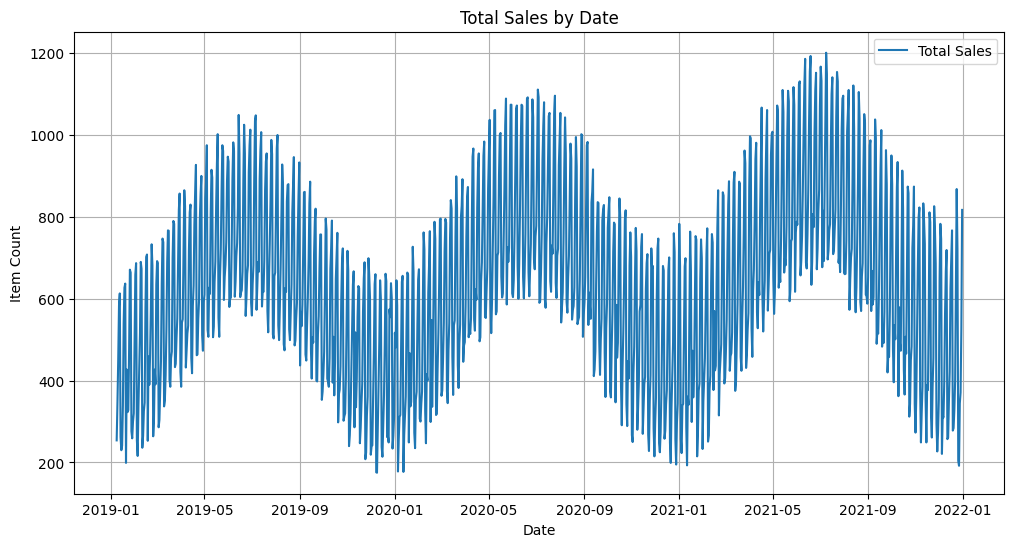

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings (optional)
warnings.filterwarnings("ignore")


# Calculate total sales by date
df_plot = sales[['date', 'item_count']].groupby('date').sum().reset_index()

# Plot using Matplotlib and Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='date', y='item_count', label='Total Sales')
plt.title('Total Sales by Date')
plt.xlabel('Date')
plt.ylabel('Item Count')
plt.grid(True)
plt.show()


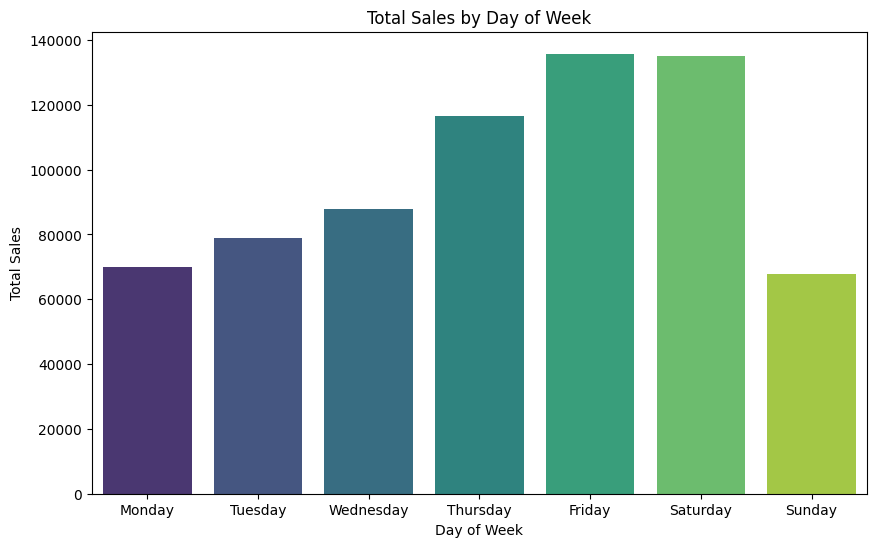

In [129]:
# Calculate total sales by day of the week
sales['weekday'] = pd.to_datetime(sales['date']).dt.day_name()
df_plot = sales[['weekday', 'item_count']].groupby('weekday').sum().reset_index()

# Ensure correct order of days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_plot['weekday'] = pd.Categorical(df_plot['weekday'], categories=day_order, ordered=True)
df_plot = df_plot.sort_values('weekday')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='weekday', y='item_count', palette='viridis')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()


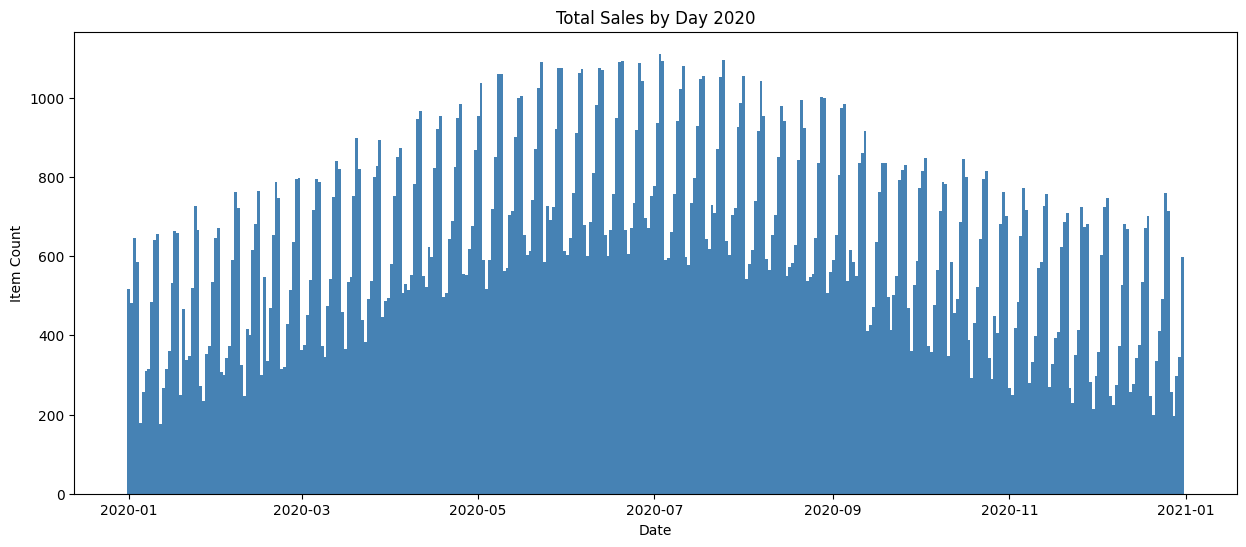

In [130]:
# Filter data for a specific year
SINGLE_YEAR = 2020
df_sales_single_year = sales[pd.to_datetime(sales['date']).dt.year == SINGLE_YEAR]

# Calculate total sales by date
df_plot = df_sales_single_year[['date', 'item_count']].groupby('date').sum().reset_index()

# Plot using Matplotlib
plt.figure(figsize=(15, 6))
plt.bar(df_plot['date'], df_plot['item_count'], width=1, color='steelblue', edgecolor='none')
plt.title(f'Total Sales by Day {SINGLE_YEAR}')
plt.xlabel('Date')
plt.ylabel('Item Count')
plt.show()


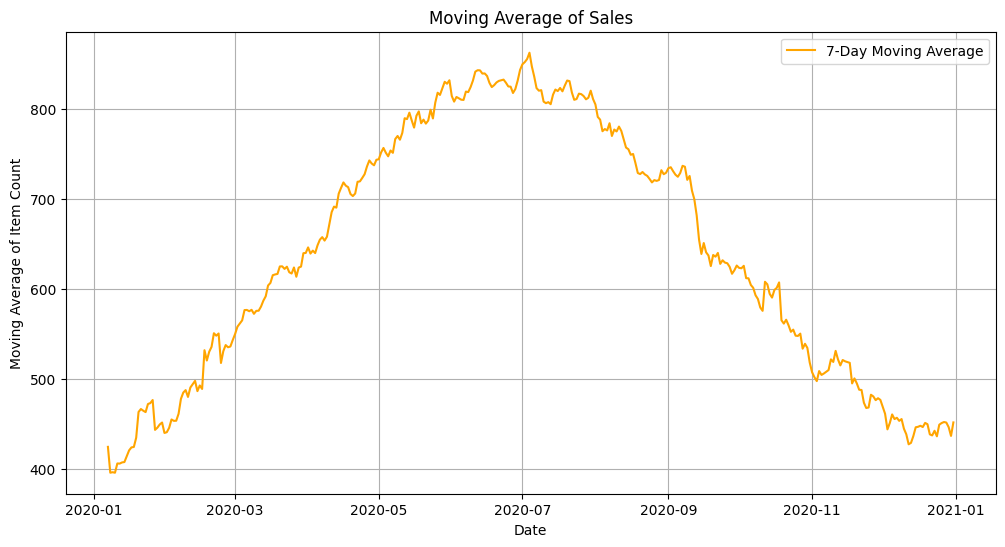

In [131]:
# Calculate 7-day moving average
df_plot['moving_average'] = df_plot['item_count'].rolling(window=7).mean()

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='date', y='moving_average', label='7-Day Moving Average', color='orange')
plt.title('Moving Average of Sales')
plt.xlabel('Date')
plt.ylabel('Moving Average of Item Count')
plt.grid(True)
plt.show()


In [140]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Prepare the features (X) and target (y)
X = sales[['item_id', 'store_id', 'price', 'month', 'day_of_week','year']]
y = sales['item_count']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = model.predict(X_test)


In [133]:
print(y_pred)

[ 0.31608546 -0.02942818  0.1461256  ...  0.05525805 -0.16100727
 -0.04232921]


In [134]:
# Create future dates for prediction (next 3 months)
future_dates = pd.date_range(start='2022-03-01', end='2022-05-31', freq='D')

# Create a DataFrame for the future data (same structure as X)
future_data = []

for store_id in sales['store_id'].unique():
    for item_id in sales['item_id'].unique():
        for date in future_dates:
            future_data.append({
                'item_id': item_id,
                'store_id': store_id,
                'price': sales.loc[sales['item_id'] == item_id, 'price'].values[0],  # Use historical price
                'month': date.month,
                'day_of_week': date.weekday(),
                'year': date.year
            })

# Convert to DataFrame
future_df = pd.DataFrame(future_data)

# Ensure the future_df has the same features as used during training
# Drop unnecessary columns or adjust data types
future_df = future_df[[col for col in future_df.columns if col in model.get_booster().feature_names]]

# Predict future sales
future_sales = model.predict(future_df)

# Add the predictions to the future DataFrame
future_df['forecasted_sales'] = future_sales

# Let's inspect the future predictions
future_df.head()


,item_id,store_id,price,month,day_of_week,year,forecasted_sales
0,4,1,26.42,3,1,2022,24.009132
1,4,1,26.42,3,2,2022,26.279982
2,4,1,26.42,3,3,2022,33.496689
3,4,1,26.42,3,4,2022,37.723049
4,4,1,26.42,3,5,2022,37.723049


In [135]:
future_df.to_csv('sales_forecasting.csv', index=False)


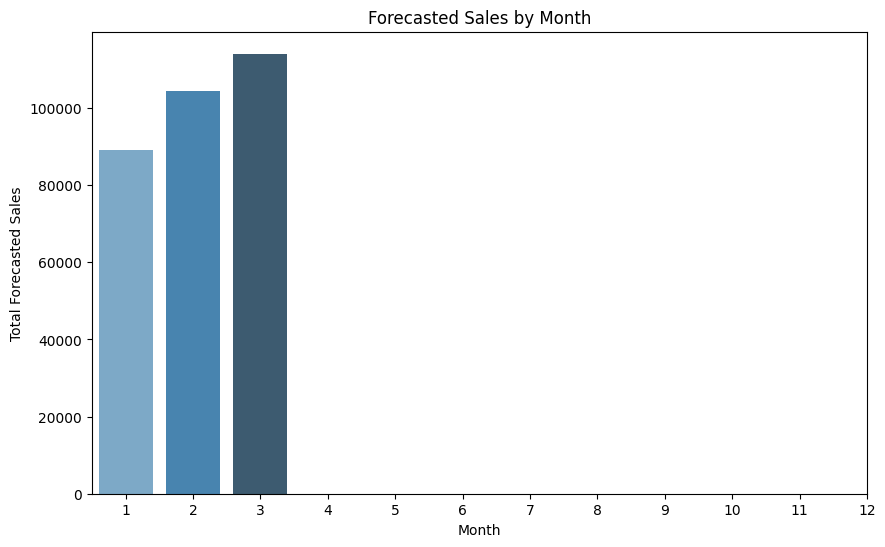

In [136]:
# Forecasted Sales by Month
monthly_sales = future_df.groupby('month')['forecasted_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='month', y='forecasted_sales', palette='Blues_d')
plt.title('Forecasted Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Forecasted Sales')
plt.xticks(ticks=range(0, 12), labels=[f'{i+1}' for i in range(12)])  # Assuming numeric months
plt.show()


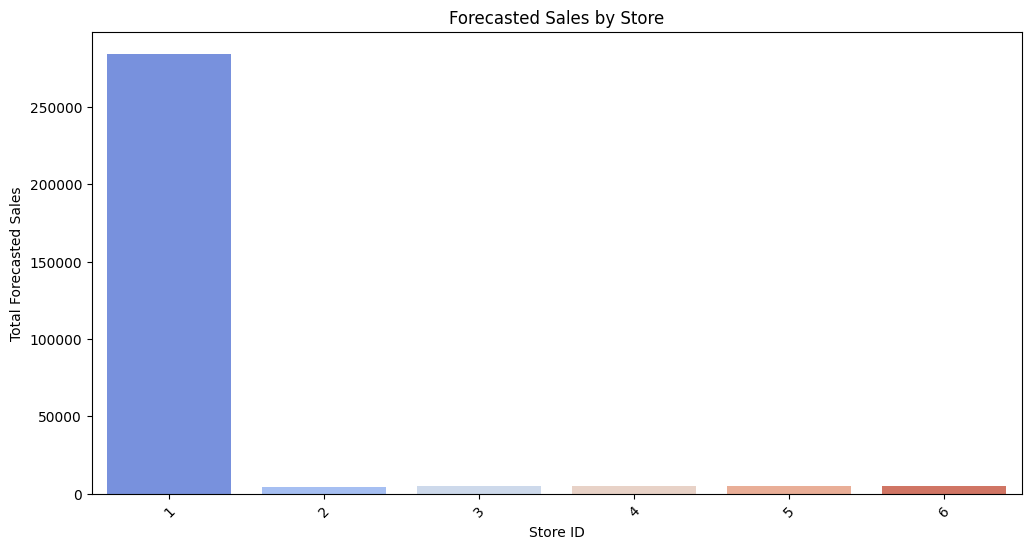

In [137]:
# Forecasted Sales by Store
store_sales = future_df.groupby('store_id')['forecasted_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x='store_id', y='forecasted_sales', palette='coolwarm')
plt.title('Forecasted Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Forecasted Sales')
plt.xticks(rotation=45)
plt.show()


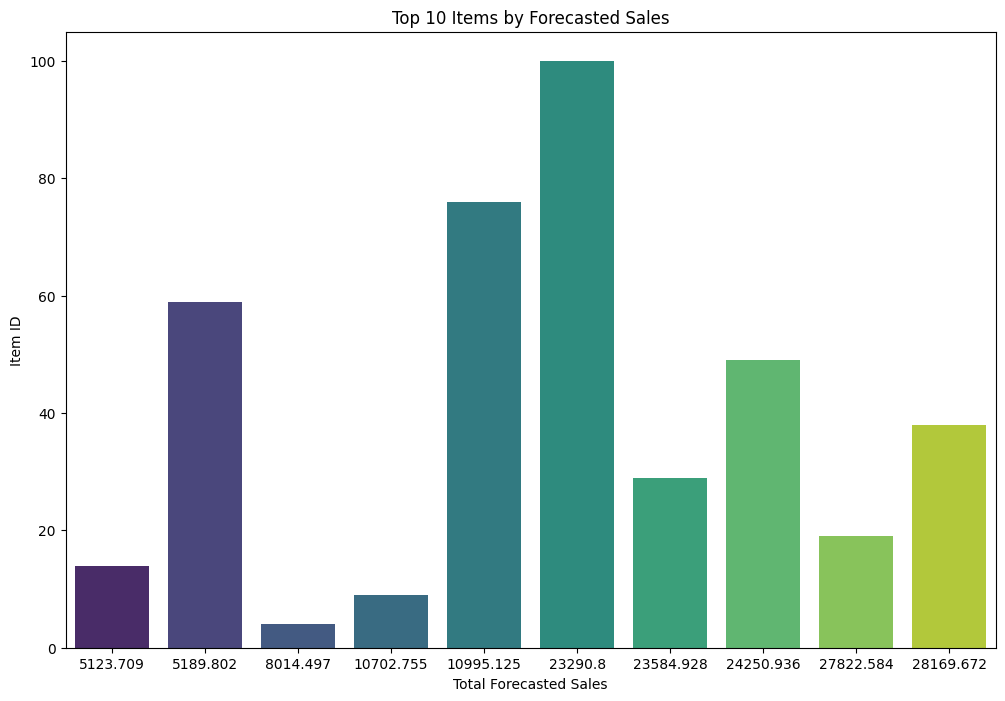

In [138]:
# Forecasted Sales by Item - Horizontal Bar Chart
item_sales = future_df.groupby('item_id')['forecasted_sales'].sum().reset_index()
top_items = item_sales.sort_values(by='forecasted_sales', ascending=False).head(10)  # Top 10 items

plt.figure(figsize=(12, 8))
sns.barplot(data=top_items, x='forecasted_sales', y='item_id', palette='viridis')
plt.title('Top 10 Items by Forecasted Sales')
plt.xlabel('Total Forecasted Sales')
plt.ylabel('Item ID')
plt.show()
